In [2]:
import random
from math import exp, fsum, log
import numpy  as np#just for generate random normal distributed values

# Part 2: Scalar Backpropagation

## Question 3

### Functions

In [3]:
def sigmoid(x):
  return 1 / (1 + exp(-x))

def softmax(o,i):
  """
    Parameters:
      -o : vector of softmax input
      -i : index i of o
  """
  return exp(o[i]) / fsum([exp(oj) for oj in o])

def cross_entropy_loss(y,t):
  """
    Parameters:
      -y: vector y output of softmax
      -t: target vector
  """
  return -1 * log(y[t.index(1)])

def scalar_dl_dy(y,t,i):
  """
    Parameters:
      -y: vector output of softmax
      -t: target vector
      -i: index of y
  """
  if i == t.index(1):
      dl_dy_i = -1.0 / y[i]
  else:
      dl_dy_i = 0.0  
  
  return dl_dy_i

def scalar_dy_do(y,i,j):
  """
    Parameters:
      -y: vector output of softmax
      -i: index of y
      -j: index of o ( o = h*V +c)
  """
  if i==j:
    dy_do = y[i]*(1-y[i])
  else:
    dy_do = -1*y[i]*y[j]
  
  return dy_do

def scalar_dl_do(dl_dy,dy_do,i):
  """
    Parameters:
      -dl_dy: vector of derivates of the loss wrt softmax output
      -dy_do: matrix with derivatives of softmax output wrt softmax input ( o = h*V +c)
      -i    : index of o
  """
  dl_do_i = 0.0
  for k,dl_dy[k] in enumerate(dl_dy):
    
    dl_do_i += dl_dy[k]*dy_do[k][i]

  return dl_do_i

def scalar_do_dh(V,i,j):
  """
      Parameters:
        -V: matrix of weights from sigmoid output to softmax input
        -i: index of o (softmax input)
        -j: index of h (sigmoid output)
    """
  return V[j][i]

def scalar_dl_dh(dl_do,do_dh,i):
  """
    Parameters:
      -dl_do: vector of derivates of the loss wrt softmax input
      -do_dh: matrix with derivatives of softmax input wrt sigmoid output
      -i    : index of k (sigmoid output)
  """
  dl_dh_i = 0.0
  for j,dl_do[j] in enumerate(dl_do):
    
    dl_dh_i += dl_do[j]*do_dh[j][i]

  return dl_dh_i  



def scalar_dl_dv(dl_do,do_dv_ij,j):
  """
    Parameters:
      -dl_do    : vector of derivatives of the loss wrt softmax inputs
      -do_dv_ij : scalar derivative of the ith-element of softmac inputs wrt the ij_th elements of weights V
      -j        : column index of weights V
  """
  
  return dl_do[j]*do_dv_ij

def scalar_dl_dc(dl_do,do_dc_i,i):
  """
    -Parameters:
      -dl_do    : derivative of the loss wrt softmax input
      -do_dc_i  : derivative of softmax inpuot with respect to weight c (always 1)
      -i        : index of softmax input
  """
  return dl_do[i]*do_dc_i

def scalar_dh_dk(k,i):
  """
    -Parameters:
      -k: vector linear input of sigmoid
      -i: index of k
  """
  return sigmoid(k[i])*(1-sigmoid(k[i]))

def scalar_dl_dk(dl_dh,dh_dk,i):
  """
    -Parameters:
      -dl_dh: derivative of the loss wrt sigmoid output
      -dh_dk: derivative of the sigmoid output wrt to sigmoid input
      -i    : index of sigmoid input k
  """
  return dl_dh[i]*dh_dk[i]

def scalar_dl_dw(dl_dk, dk_dw_ij,j):
  """
      -dl_dk    : vector of derivatives of the loss wrt sigmoid inputs
      -dk_dw_ij : scalar derivative of the ith-element of sigmoid inputs wrt the ij_th elements of weights W
      -j        : column index of weights W
  """

  return dl_dk[j]*dk_dw_ij

def scalar_dl_db(dl_dk,dk_db_i,i):
  """
    -Parameters:
      -dl_dk    : derivative of the loss wrt sigmoid input
      -dk_db_i  : derivative of sigmoid input with respect to weight b (always 1)
      -i        : index of sigmoid input
  """
  return dl_dk[i]*dk_db_i  


In [4]:
def initialize():
    """ Initialize lists of inputs, bias, weights and target class"""
    x = [1.0,-1.0]              #inputs

    W = [[1.0, 1.0, 1.0],
        [-1.0, -1.0, -1.0]
        ]                       #input weights

    b = [0.0, 0.0, 0.0]         # input-bias

    k = [0.0, 0.0, 0.0]         # linear outputs  (x * W + b )

    h = [0.0, 0.0, 0.0]         # sigmoid activation outputs

    c = [0.0, 0.0]              # constant-bias 

    V = [[1.0, 1.0],
        [-1.0, -1.0],
        [-1.0, -1.0]
        ]                       # sigmoid-output weights

    o = [0.0, 0.0]              # h * V + c

    y = [0.0, 0.0]              # softmax activated output

    t = [1,0]                   #target class
    
    return x,W,b,k,h,c,V,o,y,t

### Forward Pass

In [5]:
x,W,b,k,h,c,V,o,y,t = initialize()

# K = X * W + b
for j in range(0,len(k)):     # Len of K-nodes
    for i in range(0,len(x)): # number of inputs
        k[j] += W[i][j] * x[i]

    k[j] += b[j]

    h[j] = sigmoid(k[j])

#SoftMax Activation
for j in range(0,len(y)):
    for i in range(0,len(h)):
        o[j] += h[i] * V[i][j]

    o[j] += c[j]

for j in range(0,len(y)):
    y[j] = softmax(o,j)


l = cross_entropy_loss(y,t)


print(f"-Linear non-activated outputs: \nk = {k}\n")
print(f"-Sigmoid activated outputs: \nh = {h}\n")
print(f"-Soft-Max activation : \ny={y}\n")
print(f"Loss = -log(y_c) = {l}")


-Linear non-activated outputs: 
k = [2.0, 2.0, 2.0]

-Sigmoid activated outputs: 
h = [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]

-Soft-Max activation : 
y=[0.5, 0.5]

Loss = -log(y_c) = 0.6931471805599453


### BACKWARD PASS

In [6]:
""" ############# DL / DY #############"""
dl_dy = [0.0, 0.0] #derivatives of the loss w.r.t softmax output

for i in range(0,len(dl_dy)):

    dl_dy[i] = scalar_dl_dy(y,t,i)

print(f"dl_dy = {dl_dy}")


""" ############# DY / DO #############"""

dy_do = [[0.0, 0.0],[0.0, 0.0]] #derivatives of the loss w.r.t softmax output

for i,y_i in enumerate(y):
    for j,o_j in enumerate(o):
        dy_do[i][j] = scalar_dy_do(y,i,j)

print(f"dy_do = {dy_do}")

""" ############# DL / DO ############# """

dl_do = [0.0, 0.0]

for i in range(0,len(dl_do)):

    dl_do[i] = scalar_dl_do(dl_dy,dy_do,i)

print(f"dl_do = {dl_do}")

""" ############# DO / DH #############"""

do_dh = [[0.0,0.0,0.0],[0.0,0.0,0.0]]

for i,o_i in enumerate(o):
    for j,k_j in enumerate(k):
        do_dh[i][j] = scalar_do_dh(V,i,j)

print(f"do_dh = {do_dh}")

""" ############# DL / DH #############"""

dl_dh = [0.0, 0.0, 0.0]


for i,k[i] in enumerate(k):
    dl_dh[i] = scalar_dl_dh(dl_do,do_dh,i)

print(f"dl_dh = {dl_dh}")

""" ############# DL / DV #############"""

dl_dv = [[0.0, 0.0],[0.0, 0.0],[0.0, 0.0]]

for i,h_i in enumerate(h): # V edges come out from h-nodes
    for j, __ in enumerate(dl_dv[i]):
        dl_dv[i][j] = scalar_dl_dv(dl_do, h_i, j)  # dOi_dVij is just h[i]


print(f"dl_dv = {dl_dv}")

""" ############# DL / DC #############"""
dl_dc = [0.0, 0.0]

for i,c_i in enumerate(c):
    do_dc_i  = 1  # O_i = sum_j(h_j*V_ji) + c_i  ==> do_i/dc_i = 1 for any i
    dl_dc[i] = scalar_dl_dc(dl_do,do_dc_i,i)

print(f"dl_dc = {dl_dc}")


""" ############# DL / DK #############"""
"""   -> using DH/DK"""    

dl_dk = [0.0, 0.0, 0.0]
dh_dk = [0.0, 0.0, 0.0]  #only interested in same i-index e.g dHi/dKi
for i, k_i in enumerate(k):
    dh_dk[i] = scalar_dh_dk(k,i)

for i,k_i in enumerate(k):
    dl_dk[i] = scalar_dl_dk(dl_dh,dh_dk,i)

print(f"dh_dk = {dh_dk}")
print(f"dl_dk = {dl_dk}")

""" ############# DL / DW #############"""

dl_dw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i, x_i in enumerate(x): # W edges come out from x-nodes
    for j, __ in enumerate(dl_dw[i]):
        dl_dw[i][j] = scalar_dl_dw(dl_dk, x_i,j) # dKi_dWij is just x[i]

print(f"dl_dw = {dl_dw}")

""" ############# DL / DB ############# """

dl_db = [0.0, 0.0, 0.0]

for i,b_i in enumerate(b):
    dk_db_i  = 1  # K_i = sum_j(x_j*W_ji) + b_i  ==> dk_i/db_i = 1 for any i
    dl_db[i] = scalar_dl_db(dl_dk,dk_db_i,i)

print(f"dl_db = {dl_db}")


dl_dy = [-2.0, 0.0]
dy_do = [[0.25, -0.25], [-0.25, 0.25]]
dl_do = [-0.5, 0.5]
do_dh = [[1.0, -1.0, -1.0], [1.0, -1.0, -1.0]]
dl_dh = [0.0, 0.0, 0.0]
dl_dv = [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
dl_dc = [-0.5, 0.5]
dh_dk = [0.10499358540350662, 0.10499358540350662, 0.10499358540350662]
dl_dk = [0.0, 0.0, 0.0]
dl_dw = [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
dl_db = [0.0, 0.0, 0.0]


## Question 4

In [27]:
from data import load_synth
import matplotlib.pyplot as plt 
#(xtrain, ytrain), (xval, yval), num_cls = load_synth()


In [84]:
class Q4_DNN:
    def __init__(self):
        self.x = None #first layer input nodes
        self.W = None #first layer weights matrix
        self.b = None #input bias
        self.k = None #first layer linear output
        self.h = None #sigmoid activatio  output
        self.V = None #second later weight matrix
        self.c = None #second layer bias
        self.o = None #softmax input
        self.y = None #softmax output
        self.t = None #target vector

        (self.xtrain, self.ytrain), (self.xval, self.yval), self.num_cls = load_synth()

    def default_init(self):
        self.set_nodes()
        self.set_weights_W()
        self.set_weights_V()
        self.set_bias_b()
        self.set_bias_c()        
    
    def set_nodes(self,x=2,k=3,h=3,o=2,y=2):
        """
        Inititalize list of nodes with specific sizes
        Parameters:
            x: size of first layer input nodes
            k: size of first layer linear output
            h: size of sigmoid nodes layer
            o: size of softmax input layer
            y: size of softmax output layer
        """
        self.x = [0.0 for _ in range(x)]
        self.k = [0.0 for _ in range(k)]
        self.h = [0.0 for _ in range(h)]
        self.o = [0.0 for _ in range(o)]
        self.y = [0.0 for _ in range(y)]
    
    def set_weights_W(self,seed=32,mu=0,sigma=0.1):
        """
        Initialize weights matrix W
        Parameters:
            -seed   : random seed
            -mu     : mean of the normal distribution from where the random weights are generated
            -sigma  : standar deviation of the normal distribution from where the random weights are generated
        """
        random.seed(32)
        self.W = [[np.random.normal(loc=mu,scale=sigma) for _ in range(len(self.k))] for _ in range(len(self.x))]

    def set_weights_V(self,seed=32,mu=0,sigma=0.1):
        """
        Initialize weights matrix V
        Parameters:
            -seed   : random seed
            -mu     : mean of the normal distribution from where the random weights are generated
            -sigma  : standar deviation of the normal distribution from where the random weights are generated
        """
        random.seed(32)
        self.V = [[np.random.normal(loc=mu,scale=sigma) for _ in range(len(self.o))] for _ in range(len(self.h))]
    
    def set_bias_b(self,b=3):
        self.b = [0.0 for _ in range(b)]
    def set_bias_c(self,c=2):
        self.c = [0.0 for _ in range(c)]        

    
    def train(self,x_train,target,alpha):
        """ ######################################## FORWARD #####################################"""

        x = x_train
        W = self.W
        b = self.b
        k = self.k 
        h = self.h 
        V = self.V 
        c = self.c 
        o = self.o 
        y = self.y 
        t = target



        # K = X * W + b
        for j in range(0,len(k)):     # Len of K-nodes
            for i in range(0,len(x)): # number of inputs
                k[j] += W[i][j] * x[i]

            k[j] += b[j]

            h[j] = sigmoid(k[j])

        #SoftMax Activation
        for j in range(0,len(y)):
            for i in range(0,len(h)):
                o[j] += h[i] * V[i][j]

            o[j] += c[j]

        for j in range(0,len(y)):
            y[j] = softmax(o,j)

        l = cross_entropy_loss(y,t)

        """ ######################################## BACKWARD #####################################"""

        dl_dy = [0.0, 0.0] #derivatives of the loss w.r.t softmax output
        dy_do = [[0.0, 0.0],[0.0, 0.0]] #derivatives of the loss w.r.t softmax output
        dl_do = [0.0, 0.0]
        do_dh = [[0.0,0.0,0.0],[0.0,0.0,0.0]]
        dl_dh = [0.0, 0.0, 0.0]
        dl_dv = [[0.0, 0.0],[0.0, 0.0],[0.0, 0.0]]
        dl_dc = [0.0, 0.0]
        dl_dk = [0.0, 0.0, 0.0]
        dh_dk = [0.0, 0.0, 0.0]  #only interested in same i-index e.g dHi/dKi
        dl_dw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
        dl_db = [0.0, 0.0, 0.0]

        for i in range(0,len(dl_dy)):
            dl_dy[i] = scalar_dl_dy(y,t,i)

        for i,_ in enumerate(y):
            for j,__ in enumerate(o):
                dy_do[i][j] = scalar_dy_do(y,i,j)

        for i in range(0,len(dl_do)):
            dl_do[i] = scalar_dl_do(dl_dy,dy_do,i)

        for i,_ in enumerate(o):
            for j,__ in enumerate(k):
                do_dh[i][j] = scalar_do_dh(V,i,j)

        for i,k[i] in enumerate(k):
            dl_dh[i] = scalar_dl_dh(dl_do,do_dh,i)

        for i,h_i in enumerate(h): # V edges come out from h-nodes
            for j, _ in enumerate(dl_dv[i]):
                dl_dv[i][j] = scalar_dl_dv(dl_do, h_i, j)  # dOi_dVij is just h[i]

        for i,_ in enumerate(c):
            do_dc_i  = 1  # O_i = sum_j(h_j*V_ji) + c_i  ==> do_i/dc_i = 1 for any i
            dl_dc[i] = scalar_dl_dc(dl_do,do_dc_i,i)

        for i, _ in enumerate(k):
            dh_dk[i] = scalar_dh_dk(k,i)

        for i,_ in enumerate(k):
            dl_dk[i] = scalar_dl_dk(dl_dh,dh_dk,i)

        for i, x_i in enumerate(x): # W edges come out from x-nodes
            for j, __ in enumerate(dl_dw[i]):
                dl_dw[i][j] = scalar_dl_dw(dl_dk, x_i,j) # dKi_dWij is just x[i]

        for i,_ in enumerate(b):
            dk_db_i  = 1  # K_i = sum_j(x_j*W_ji) + b_i  ==> dk_i/db_i = 1 for any i
            dl_db[i] = scalar_dl_db(dl_dk,dk_db_i,i)

        
        """ ######################################## UPDATING #####################################"""

        for i, w_i in enumerate(W):
            for j, w_ij in enumerate(w_i):
                W[i][j] = W[i][j] - alpha * dl_dw[i][j]

        for i, b_i in enumerate(b):
            b[i] = b[i] - alpha * dl_db[i]

        for i, v_i in enumerate(V):
            for j, v_ij in enumerate(v_i):
                V[i][j] = V[i][j] - alpha * dl_dv[i][j]

        for i, c_i in enumerate(c):
            c[i] = c[i] - alpha * dl_dc[i]

        return l        

    def train_epoch(self,alpha=0.02):
        self.losses = []
        counter = 0
        for i,xtrain_i in enumerate(self.xtrain):
            target_i = [0,1] if self.ytrain[i] == 0 else [1,0]
            
            loss = self.train(xtrain_i,target_i,alpha=alpha)

            self.losses.append(loss)
            # if counter < 1000:
            #     counter += 1
            # else:
            #     break        

    
        

In [90]:
dnn = Q4_DNN()
dnn.default_init()

dnn.train_epoch(alpha=0.02)


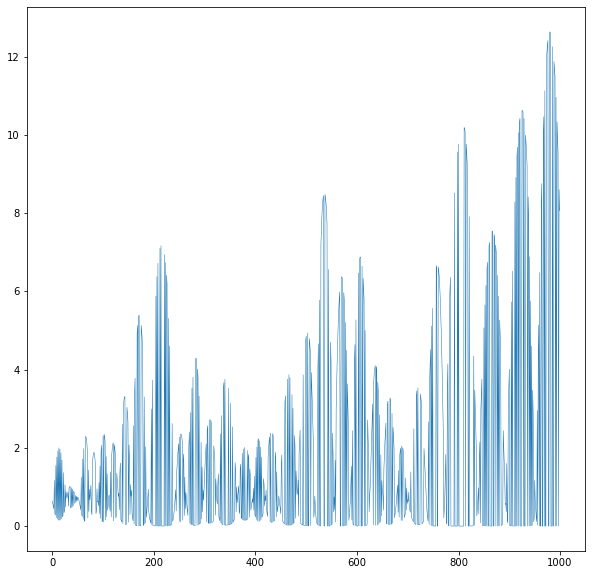

In [87]:
plt.rcParams['figure.figsize'] = [10, 10]
# plt.xlim([0, 60000])
# plt.ylim([0, 2000])
plt.plot(dnn.losses[:1000],linewidth=0.5)
